In [190]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../../../src')


import methods
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import numpy as np
import betterspy

import qtree_methods as qtm
import random_walk as rw
from sklearn.cluster import KMeans

In [191]:
# create k lumps


# --- this one creates a complete(?) graph (very connected)
# n = 3

# c = [0, 1, 2, 4]
# k = len(c)

# img_array = np.zeros((n,n*k))
# for i in range(k):
#     img_array[:n,i*n:(i+1)*n] = c[i]

# plt.imshow(img_array)

# wf = methods.WeightKernel(
#     dist_sig = np.inf,
#     intensity_sig = 1
# )

# # problem with mask?
# G = methods.ImageGraph(
#     img_array, 
#     mask_array=None, 
#     wf=wf, 
#     neighbour_depth = np.inf, 
#     cmap='viridis'
#     )

# --- we want lumps
G = nx.Graph()
n = 3
k = 3

int_weight = 5
ext_weight = 1

# initialse 
for k_i in range(k):
    for n_i in range(n):
        G.add_node((k_i,n_i))

for nd_1 in G.nodes:
    for nd_2 in G.nodes:
        if nd_1 == nd_2:
            continue
        if nd_1[0] == nd_2[0]: # same lump
            G.add_edge(nd_1, nd_2, weight=int_weight)
        else:
            G.add_edge(nd_1, nd_2, 
                    #    weight=np.abs(nd_1[0]-nd_2[0]),
                       weight=ext_weight
                       )

# nx.write_gexf(G,'lumpability_initial.gexf')

In [192]:
G.edges.data()

EdgeDataView([((0, 0), (0, 1), {'weight': 5}), ((0, 0), (0, 2), {'weight': 5}), ((0, 0), (1, 0), {'weight': 1}), ((0, 0), (1, 1), {'weight': 1}), ((0, 0), (1, 2), {'weight': 1}), ((0, 0), (2, 0), {'weight': 1}), ((0, 0), (2, 1), {'weight': 1}), ((0, 0), (2, 2), {'weight': 1}), ((0, 1), (0, 2), {'weight': 5}), ((0, 1), (1, 0), {'weight': 1}), ((0, 1), (1, 1), {'weight': 1}), ((0, 1), (1, 2), {'weight': 1}), ((0, 1), (2, 0), {'weight': 1}), ((0, 1), (2, 1), {'weight': 1}), ((0, 1), (2, 2), {'weight': 1}), ((0, 2), (1, 0), {'weight': 1}), ((0, 2), (1, 1), {'weight': 1}), ((0, 2), (1, 2), {'weight': 1}), ((0, 2), (2, 0), {'weight': 1}), ((0, 2), (2, 1), {'weight': 1}), ((0, 2), (2, 2), {'weight': 1}), ((1, 0), (1, 1), {'weight': 5}), ((1, 0), (1, 2), {'weight': 5}), ((1, 0), (2, 0), {'weight': 1}), ((1, 0), (2, 1), {'weight': 1}), ((1, 0), (2, 2), {'weight': 1}), ((1, 1), (1, 2), {'weight': 5}), ((1, 1), (2, 0), {'weight': 1}), ((1, 1), (2, 1), {'weight': 1}), ((1, 1), (2, 2), {'weight': 1

[5.41029358e-17+0.j 1.31250000e+00+0.j 1.31250000e+00+0.j
 5.62500000e-01+0.j 5.62500000e-01+0.j 1.31250000e+00+0.j
 1.31250000e+00+0.j 1.31250000e+00+0.j 1.31250000e+00+0.j]


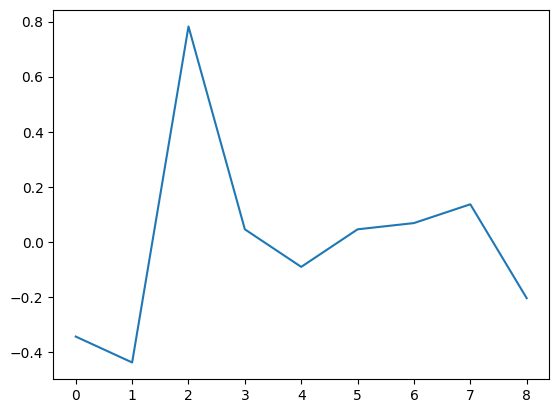

In [193]:
P = nx.normalized_laplacian_matrix(G)
vals, vecs = scipy.linalg.eig(P.toarray())

print(vals)
# plt.imshow(P.toarray())
plt.plot(np.real(vecs[:,2]))

[[0.     0.3125 0.3125 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.3125 0.     0.3125 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.3125 0.3125 0.     0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.     0.3125 0.3125 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.3125 0.     0.3125 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.3125 0.3125 0.     0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.     0.3125 0.3125]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.3125 0.     0.3125]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.3125 0.3125 0.    ]]


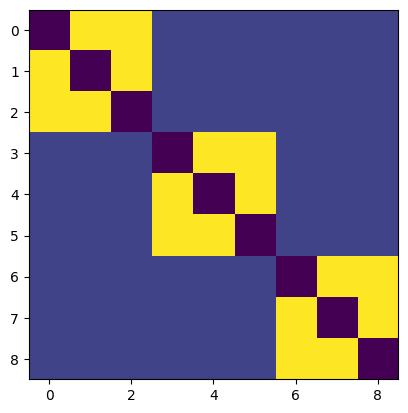

In [194]:
walk = rw.RandomWalk(G)
plt.imshow(walk.T)
print(walk.T)

# note normalised is not the same eigenvalues as transition; we need left (random walk) normalised!

[-0.3125+0.j  0.4375+0.j  1.    +0.j  0.4375+0.j -0.3125+0.j -0.3125+0.j
 -0.3125+0.j -0.3125+0.j -0.3125+0.j]


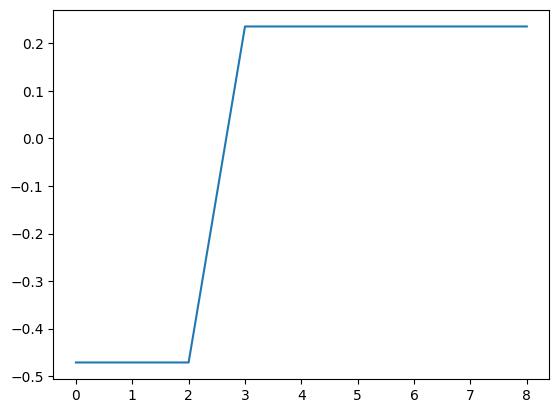

In [195]:
vals, vecs = scipy.linalg.eig(walk.T)
# vals = scipy.linalg.eigvals(walk.T)
# plt.plot(vals)
print(vals)
plt.plot(np.real(vecs[:,1]))

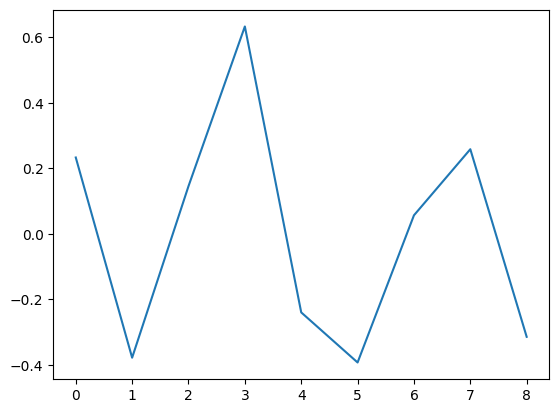

In [196]:
v = np.real(vecs[:,5])
plt.plot(v)
# ???

In [197]:
# coarse graph

# create partition
nodes_list = list(G.nodes)
partition_list = []
for nd in nodes_list:
    partition_list.append(nd[0])

print(nodes_list)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [198]:
list(G.nodes)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [199]:
CG = methods.CoarseGraph(G, range(len(nodes_list)), partition_list, mode="lafon_06")

In [200]:
nx.adjacency_matrix(CG).toarray()

array([[3.33333333, 1.        , 1.        ],
       [1.        , 3.33333333, 1.        ],
       [1.        , 1.        , 3.33333333]])

In [205]:
walk_coarse = rw.RandomWalk(CG)
print(walk_coarse.T)

[[0.625  0.1875 0.1875]
 [0.1875 0.625  0.1875]
 [0.1875 0.1875 0.625 ]]


[0.4375+0.j 1.    +0.j 0.4375+0.j]


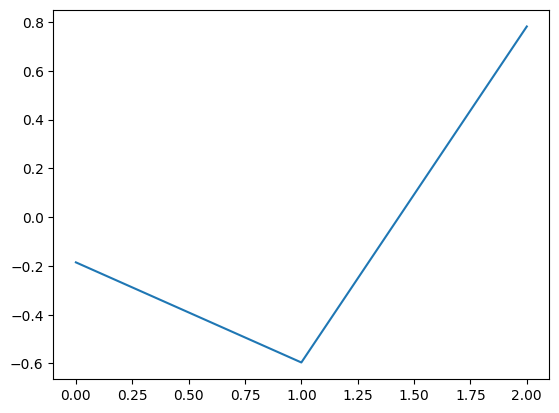

In [204]:
walk_coarse.T
vals, vecs = scipy.linalg.eig(walk_coarse.T)

print(vals)
plt.plot(np.real(vecs[:,2]))
# transition matricies seem to match!